# Kvantna Hadamardova transformacija

Hadamardova transformacija ima takođe jako bitne primene i u oblasti kvantnog računarstva. Hadamardova matrica dimenzija $2 \times 2$ predstavlja jednu od osnovnih kvantnih operacija koje se mogu primeniti na jednom kjubitu (kjubit je analogon bita u kvantnom računarstvu) i ključan je sastojak mnogih kvantnih algoritama.


## Kvantna stanja

Da bismo objasnili kako Hadamardova transformacija deluje na registar kjubita moramo prvo objasniti Dirakovu notaciju koja se koristi za opisivanje stanja kvantnog registra. Kao i klasični bit, kjubit može biti u stanju 0 koje se u Dirakovoj notaciji obeležava sa $|0\rangle$ i u stanju 1 kojem odgovara $|1\rangle$. Za razliku od bita kome su 0 i 1 dve međusobno isključive vrednosti, kjubit može biti i u superpoziciji stanja $|0\rangle$ i $|1\rangle$. Ovo praktično znači da su $|0\rangle$ i $|1\rangle$ dva ortogonalna vektora i da je stanje kjubita linearna kombinacija ova dva vektora. Dakle, stanje kjubita se može zapisati kao $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ gde su $\alpha$ i $\beta$ kompleksni brojevi, pri čemu se zahteva i uslov normalizacije $|\alpha|^2 + |\beta|^2 = 1$. Takođe, umesto Dirakove notacije možemo koristiti i vektore za opis kvantnih stanja gde bismo izvršili sledeću identifikaciju

$$
|0\rangle = \begin{pmatrix}1\\0\end{pmatrix}, |1\rangle = \begin{pmatrix}0\\1\end{pmatrix},
$$

pa bi stanje kjubita u vektorskom obliku bilo zapisano kao

$$
|\psi\rangle = \begin{pmatrix}\alpha\\\beta\end{pmatrix}.
$$
U Dirakovoj notaciji $\langle\psi|$ je element dualnog vektorskog prostora i svodi se na transponovanje i konjugovanje vektora $|\psi\rangle$, tj. $\langle\psi| = \begin{pmatrix}\alpha^* & \beta^*\end{pmatrix}$.

Da bismo opisali više od jednog kjubita, koristimo tenzorski proizvod. Na primer, ako imamo registar od dva kjubita od kojih je prvi u stanju $|1\rangle$ dok je drugi u stanju $|0\rangle$, stanje ova dva kjubita možemo zapisati kao $|\psi\rangle = |1\rangle\otimes|0\rangle$ (skraćeno $|\psi\rangle = |10\rangle = |2\rangle$), ili u vektorskom obliku 

$$
|\psi\rangle = |1\rangle\otimes|0\rangle = \begin{pmatrix}0\\1\end{pmatrix}\otimes\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}0\\0\\1\\0\end{pmatrix}.
$$
Naravno, moguće je napraviti superpoziciju elemenata i u ovom većem vektorskom prostoru pa je stanje dva kjubita u opštem slučaju dato sa

$$
|\psi\rangle = \sum_{i = 0}^3\alpha_i|i\rangle = \begin{pmatrix}\alpha_0\\\alpha_1\\\alpha_2\\\alpha_3\end{pmatrix},
$$
pri čemu $\sum_{i = 0}^3|\alpha_i|^2 = 1$. U slučaju $n$ kjubita stanje je dato vektorom $|\psi\rangle = \sum_{i = 0}^{2^n - 1}\alpha_i|i\rangle$, pri čemu $\sum_{i = 0}^{2^n - 1}|\alpha_i|^2 = 1$.


## Hadamardova transformacija u kvantnim algoritmima

Hadamardova matrica se može zapisati kao

$$
H = \frac{|0\rangle\langle0| + |0\rangle\langle1| + |1\rangle\langle0| - |1\rangle\langle1|}{\sqrt{2}} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\1 & -1\end{pmatrix}.
$$

Kao što smo videli ranije, Hadamardova transformacija se može definisati rekurzivno, tako da je $H_1 = H$, $H_n = H \otimes H_{n - 1}$.

Na dva osnovna bazisna stanja Hadamardova transformacija deluje kao
$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle),
$$

$$
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle).
$$
U slučaju dva kjubita Hadamardova transformacija se svodi na tenzorski proizvod dve Adamardove matrice pa je npr.
$$
(H\otimes H)|1\rangle\otimes|0\rangle = (H|1\rangle)\otimes(H|0\rangle)\\ = \frac{1}{2}(|0\rangle - |1\rangle)\otimes(|0\rangle + |1\rangle) = \frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)\\
= \frac{1}{2}(|0\rangle + |1\rangle - |2\rangle - |3\rangle).
$$

U većini kvantnih algoritama registar se inicijalizuje u stanje 

$$
H\otimes H\otimes\dots\otimes H|00\dots 0\rangle = \frac{1}{\sqrt{2^n}}\sum_{i = 0}^{2^n - 1}|i\rangle,
$$

tj. u uniformnu superpoziciju svih bazisnih stanja. Zatim se dalji tok algoritma izvršava "paralelno" na svim bazisnim stanjima u ovoj superpoziciji i u ovome leži jedna od prednosti kvantnih računara. S obzirom da se Hadamardova transformacija izvršava na svakom kjubitu nezavisno i može se paralelizovati, vremenska složenost kvantne Hadamardove transformacije je $O(1)$.

Pomoću biblioteke `qiskit` možemo implementirati kvantnu Hadamardovu transformaciju i izvršiti je na kvantnom računaru! IBM pruža pristup nekim od svojih kvantnih procesora registrovanim korisnicima. Mi ćemo ipak ovde pokrenuti kod na simulatoru, međutim, uz male izmene kod se može izvršiti i na kvantnom računaru.

In [1]:
#!pip install qiskit

In [2]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble
from qiskit.visualization import plot_histogram

In [3]:
n = 3
qc = QuantumCircuit(n, n)

# Primeni Hadamardovu transformaciju na svaki kjubit
for qubit in range(n):
    qc.h(qubit)

# Merenje
for i in range(n):
    qc.measure(i, i)

qc.draw()

┌───┐┌─┐      
q_0: ┤ H ├┤M├──────
     ├───┤└╥┘┌─┐   
q_1: ┤ H ├─╫─┤M├───
     ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c: 3/══════╩══╩══╩═
           0  1  2

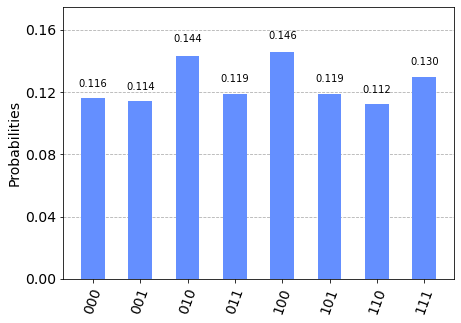

In [4]:
# Sledeći kod proverava koji od kompatibilnih kvantnih procesora
# je slobodan za izvršavanje našeg koda.

# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
#                                    not x.configuration().simulator and x.status().operational==True))


# Umesto kvantnog procesora koristićemo simulator
backend = Aer.get_backend('aer_simulator')
qobj = assemble(qc, backend)
results = backend.run(qobj).result()
answer = results.get_counts()

# Histogram rezultata merenja svih kjubita nakon izvršene Hadamardove transformacije
plot_histogram(answer)